In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students
        self.df = self.assemble_dataframe()

    def generate_gender(self):
        return np.random.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )

    def generate_major(self):
        return np.random.choice(
            ["B.Tech", "MS", "PhD"],
            size=self.num_students,
            p=[0.7, 0.2, 0.1]
        )

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.4, 0.4, 0.1, 0.1]))
            elif m == "MS":
                programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.3, 0.3, 0.2, 0.2]))
            else:
                programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.25, 0.25, 0.25, 0.25]))
        return programs

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                gpa = np.random.normal(7.0, 1.0)
            elif m == "MS":
                gpa = np.random.normal(8.0, 0.7)
            else:
                gpa = np.random.normal(8.3, 0.5)
            gpas.append(round(np.clip(gpa, 4.0, 10.0), 2))
        return gpas

    def assemble_dataframe(self):
        majors = self.generate_major()
        df = pd.DataFrame({
            "gender": self.generate_gender(),
            "major": majors,
            "program": self.generate_program(majors),
            "GPA": self.generate_gpa(majors)
        })
        return df

    def get_full_dataframe(self):
        return self.df


In [3]:
dataset = StudentDataset(num_students=500, seed=42)
df = dataset.get_full_dataframe()
df.head()


,gender,major,program,GPA
0,Female,B.Tech,CSE,4.50
1,Male,PhD,CHD,9.45
2,Male,MS,CND,7.03
3,Female,B.Tech,ECE,5.35
4,Female,B.Tech,CHD,8.02


In [4]:
df.describe(include='all')


,gender,major,program,GPA
count,500,500,500,500.00000
unique,3,3,4,NaN
top,Male,B.Tech,ECE,NaN
freq,344,346,172,NaN
mean,NaN,NaN,NaN,7.37998
std,NaN,NaN,NaN,1.06511
min,NaN,NaN,NaN,4.13000
25%,NaN,NaN,NaN,6.62750
50%,NaN,NaN,NaN,7.43000
75%,NaN,NaN,NaN,8.20000


In [5]:
filtered_df = df[(df['major'] == 'B.Tech') & (df['GPA'] > 8.0)]
filtered_df.head()
filtered_df = df[(df['major'] == 'B.Tech') & (df['GPA'] > 8.0)]
filtered_df.head()


,gender,major,program,GPA
4,Female,B.Tech,CHD,8.02
5,Male,B.Tech,ECE,9.44
6,Female,B.Tech,ECE,8.38
21,Male,B.Tech,CSE,8.39
39,Male,B.Tech,CSE,8.36


In [6]:
p_male = (df['gender'] == 'Male').mean()
p_female = (df['gender'] == 'Female').mean()
p_phd = (df['major'] == 'PhD').mean()

p_male, p_female, p_phd


(0.688, 0.292, 0.11)

In [7]:
# P(Gender = Male AND Program = CSE)
joint_prob = ((df['gender'] == 'Male') & (df['program'] == 'CSE')).mean()

# P(GPA > 8 | MS Students)
ms_df = df[df['major'] == 'MS']
cond_prob = (ms_df['GPA'] > 8).mean()

joint_prob, cond_prob


(0.232, 0.5757575757575758)

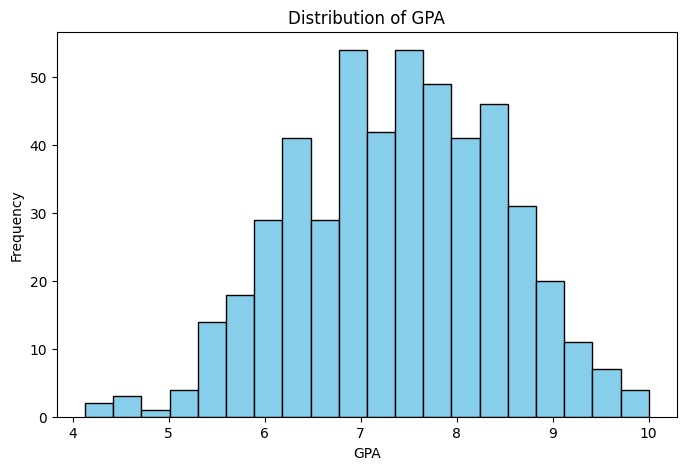

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df['GPA'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("Distribution of GPA")
plt.show()


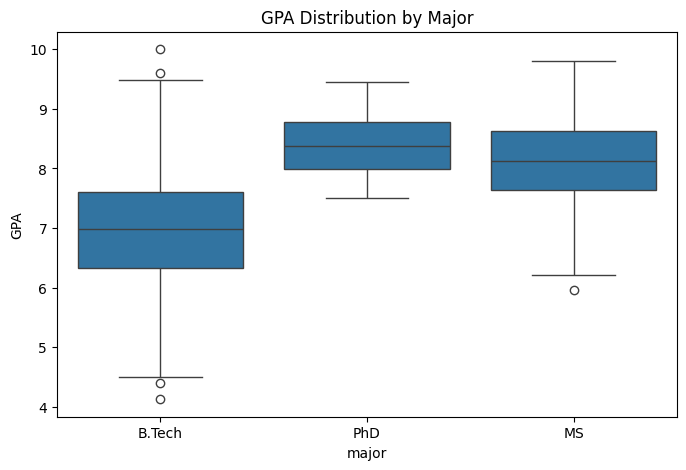

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="major", y="GPA")
plt.title("GPA Distribution by Major")
plt.show()


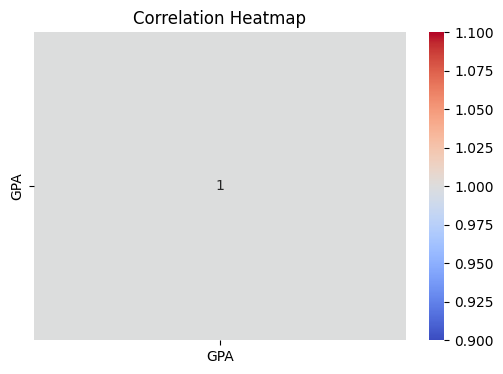

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
